In [1]:
import matplotlib
matplotlib.use('nbagg')
print(matplotlib.get_backend())

nbAgg


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['ENGINESIZE']], df['CO2EMISSIONS'], random_state=0)

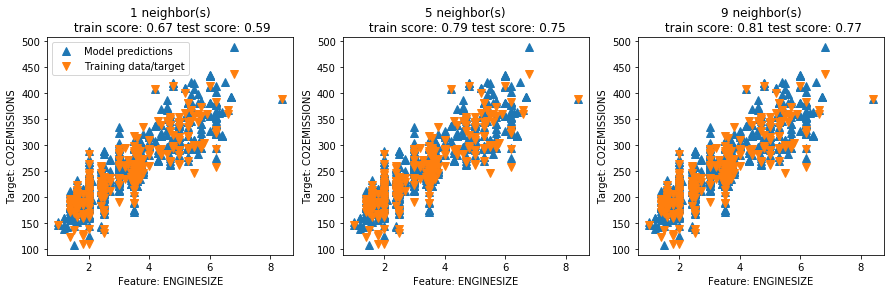

In [10]:
from sklearn.neighbors import KNeighborsRegressor
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for n, ax in zip([1,5,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train, y_train)
    ax.plot(X_train, y_train, '^', markersize=8)
    ax.plot(X_test, y_test, 'v', markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}"
                 .format(n, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature: ENGINESIZE")
    ax.set_ylabel("Target: CO2EMISSIONS")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")
plt.show()